# Bài tập Tuần 2
### Họ tên: Nguyễn Tùng
### Mã số học viên: 20231167M


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

## Bài 1: Tìm hàm ước lượng đủđơn giản và đủ tốtcho bộ dữliệu

Degree 2 - Train Mean Squared Error: 952.69, Train R-squared: 0.95
Degree 2 - Test Mean Squared Error: 8102.51, Test R-squared: -4.23


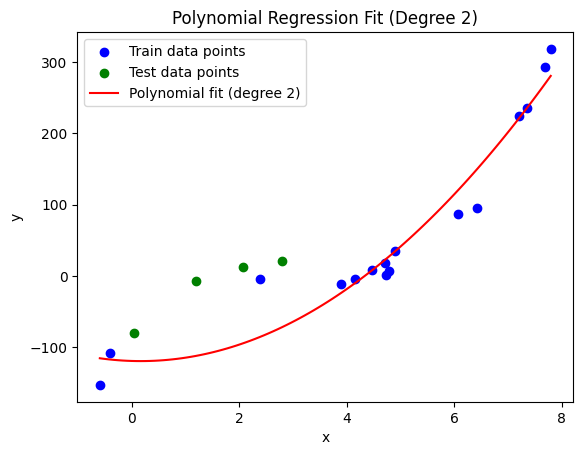

Degree 3 - Train Mean Squared Error: 94.63, Train R-squared: 0.99
Degree 3 - Test Mean Squared Error: 303.17, Test R-squared: 0.80


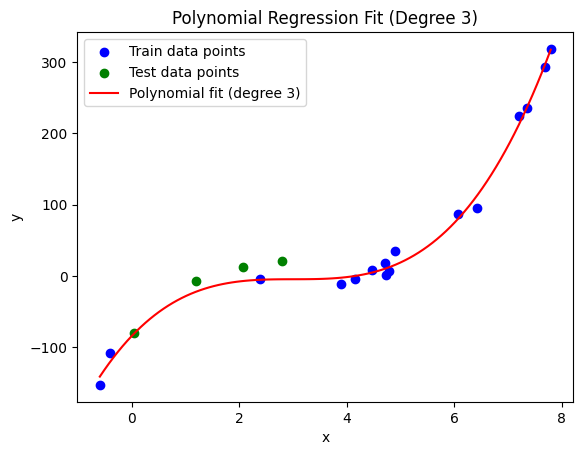

Degree 4 - Train Mean Squared Error: 92.84, Train R-squared: 0.99
Degree 4 - Test Mean Squared Error: 221.58, Test R-squared: 0.86


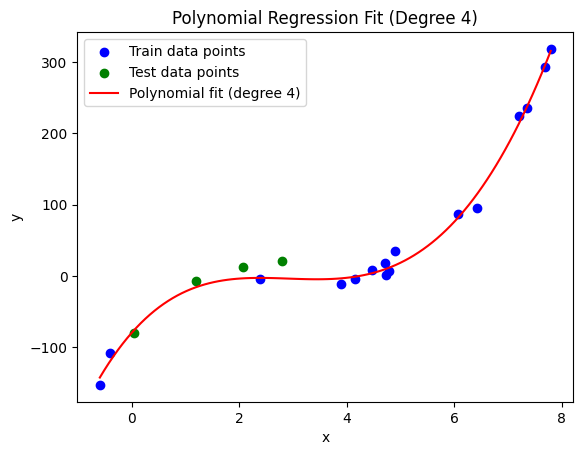

Degree 5 - Train Mean Squared Error: 73.68, Train R-squared: 1.00
Degree 5 - Test Mean Squared Error: 692.37, Test R-squared: 0.55


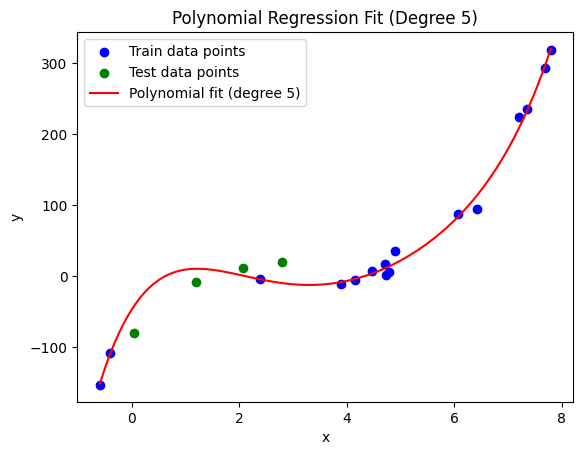


Best model is with degree 4 - Test Mean Squared Error: 221.58, Test R-squared: 0.86


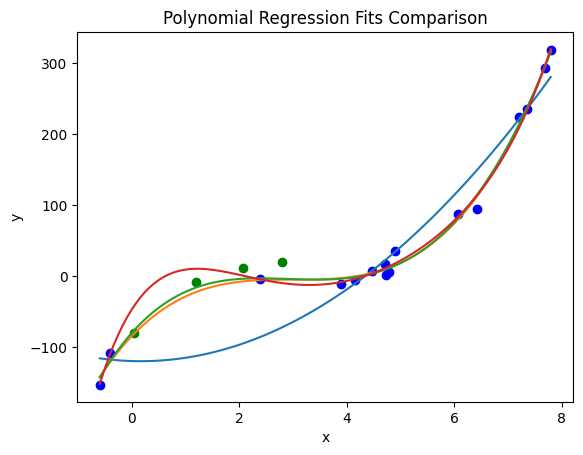

<Figure size 640x480 with 0 Axes>

In [2]:
# Extracting the data from the table
x = np.array([[7.79667589], [2.79825217], [2.06174503], [4.4713877], [7.20443649],
              [7.36014312], [4.70688117], [-0.40383889], [4.72266607], [1.20453709],
              [6.07593449], [7.69651292], [3.89733971], [4.7856351], [-0.59392188],
              [4.1507473], [0.04168784], [4.89562846], [2.38650347], [6.42758034]])

y = np.array([[318.28185696], [20.48143891], [11.97873995], [7.56902114], [224.15497306],
              [235.04403786], [17.75040067], [-107.86335911], [1.114603], [-7.67492972],
              [87.4268373], [293.22560999], [-11.49557421], [6.4415876], [-152.88870565],
              [-4.95755333], [-79.53431819], [34.97246059], [-4.50098315], [95.09276699]])

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=432)

# Function to perform polynomial regression and plot results
def polynomial_regression(x_train, y_train, x_test, y_test, degree):
    # Transforming the data to include polynomial features
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)

    # Fit a linear regression model on the transformed training data
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Predict on the training and testing data
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)

    # Calculate and print evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print(f"Degree {degree} - Train Mean Squared Error: {train_mse:.2f}, Train R-squared: {train_r2:.2f}")
    print(f"Degree {degree} - Test Mean Squared Error: {test_mse:.2f}, Test R-squared: {test_r2:.2f}")

    # Generate a range of values for prediction
    x_range = np.linspace(min(x_train), max(x_train), 100).reshape(-1, 1)
    x_range_poly = poly.transform(x_range)
    y_pred = model.predict(x_range_poly)

    # Plotting the data points and the polynomial regression curve
    plt.scatter(x_train, y_train, color='blue', label='Train data points')
    plt.scatter(x_test, y_test, color='green', label='Test data points')
    plt.plot(x_range, y_pred, color='red', label=f'Polynomial fit (degree {degree})')

    # Adding labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression Fit (Degree {degree})')
    plt.legend()
    plt.show()

    return model, poly, train_mse, test_mse, train_r2, test_r2

# List of degrees to compare
degrees = [2, 3, 4, 5]
results = []

# Perform polynomial regression for each degree and store the results
for degree in degrees:
    result = polynomial_regression(x_train, y_train, x_test, y_test, degree)
    results.append((degree, *result[2:]))

# Choose the best model based on test MSE
best_model = min(results, key=lambda item: item[2])

print(f"\nBest model is with degree {best_model[0]} - Test Mean Squared Error: {best_model[2]:.2f}, Test R-squared: {best_model[4]:.2f}")

# Plot all the polynomial regression fits for comparison
plt.scatter(x_train, y_train, color='blue', label='Train data points')
plt.scatter(x_test, y_test, color='green', label='Test data points')
x_range = np.linspace(min(x_train), max(x_train), 100).reshape(-1, 1)

for degree, train_mse, test_mse, train_r2, test_r2 in results:
    poly = PolynomialFeatures(degree=degree)
    x_range_poly = poly.fit_transform(x_range)
    model = LinearRegression()
    model.fit(poly.fit_transform(x_train), y_train)
    y_pred = model.predict(x_range_poly)
    plt.plot(x_range, y_pred, label=f'Degree {degree} (Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f})')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Fits Comparison')
# plt.legend()
plt.show()

plt.savefig("result.png")

## Bài 2: Xác định hàm ước lượng cho mô hình dự đoán quyết định mua nhà.

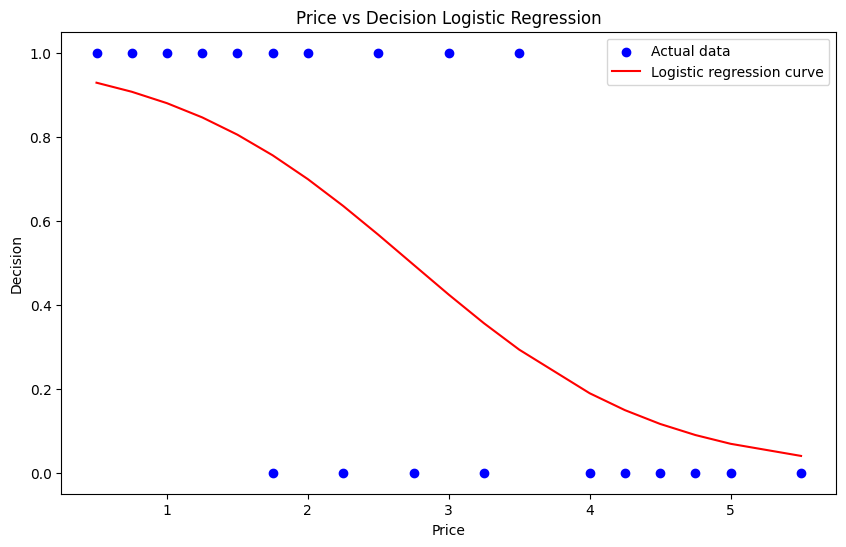

Intercept: 3.140045649401174
Coefficient: -1.1488118345536495


In [3]:
# Datasets
price = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
decision = np.array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

# Reshape the price data
price = price.reshape(-1, 1)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(price, decision)

# Predict the probabilities
predicted_prob = model.predict_proba(price)[:, 1]

# Plotting the data and the logistic regression curve
plt.figure(figsize=(10, 6))
plt.scatter(price, decision, color='blue', label='Actual data')
plt.plot(price, predicted_prob, color='red', label='Logistic regression curve')
plt.xlabel('Price')
plt.ylabel('Decision')
plt.title('Price vs Decision Logistic Regression')
plt.legend()

# Save the figure
plt.savefig('price_decision_logistic_regression.png')

# Show the plot
plt.show()

# Print the model coefficients
print(f"Intercept: {model.intercept_[0]}")
print(f"Coefficient: {model.coef_[0][0]}")

## Bài 3: Cho 2 tập điểm X0 và X1 như sau. Hãy xây dựng mô hình tuyến tính tách 2 tập điểm này. Vẽ đồ thị minh họa kết quả.

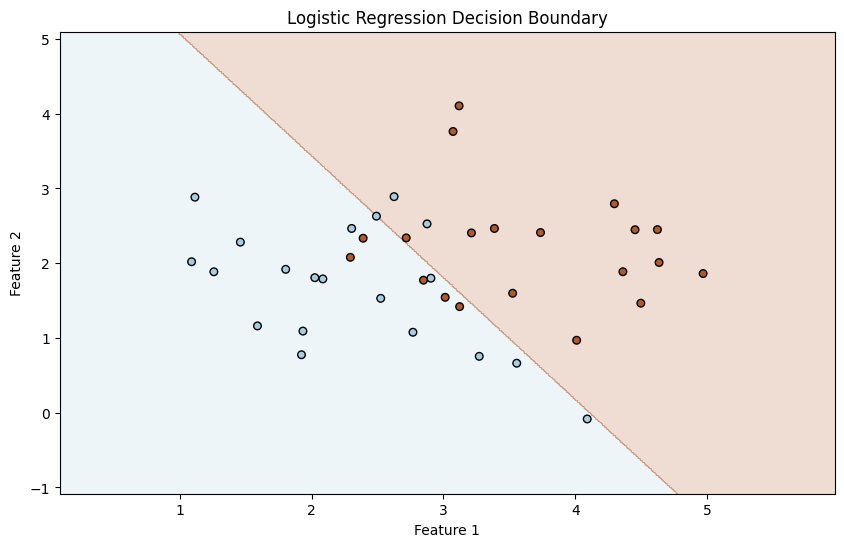

In [4]:
# Datasets
X0 = np.array([[ 1.92306918, 0.775673 ],
               [ 2.90509186, 1.7997662 ],
               [ 1.58909188, 1.16143907],
               [ 2.76874122, 1.07663514],
               [ 2.52416203, 1.53020387],
               [ 2.02414192, 1.80692632],
               [ 2.49174878, 2.62943405],
               [ 1.11439322, 2.88348991],
               [ 2.62561276, 2.89077234],
               [ 3.27183166, 0.75454543],
               [ 3.55617919, 0.66250438],
               [ 1.45945603, 2.28222634],
               [ 2.87575608, 2.52637908],
               [ 2.30375703, 2.46497356],
               [ 1.08925412, 2.01982447],
               [ 4.09096119, -0.08330889],
               [ 1.80350003, 1.91837255],
               [ 1.25827634, 1.8856175 ],
               [ 2.08532169, 1.79005729],
               [ 1.9340609 , 1.09208652]])

X1 = np.array([[4.49775285, 1.46545116],
               [3.07311718, 3.76212796],
               [3.52528933, 1.59844519],
               [2.39091046, 2.33431976],
               [3.12302646, 1.41945943],
               [4.62359547, 2.44921113],
               [3.38696098, 2.46494505],
               [4.36167918, 1.88637824],
               [3.21261415, 2.40558547],
               [2.71754956, 2.33882965],
               [4.01073111, 0.96947283],
               [3.11892586, 4.10522222],
               [2.29402636, 2.07905375],
               [3.7365999 , 2.41022672],
               [4.29699439, 2.79542218],
               [4.63617269, 2.00962462],
               [2.84870815, 1.77280105],
               [4.45368062, 2.44805003],
               [4.97052399, 1.86194687],
               [3.01324102, 1.54377016]])

# Combine datasets and create labels
X = np.vstack((X0, X1))
y = np.hstack((np.zeros(X0.shape[0]), np.ones(X1.shape[0])))

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Define function to plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.Paired)

# Plot data points and decision boundary
plt.figure(figsize=(10, 6))
plot_decision_boundary(model, X, y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.savefig('logistic_regression_decision_boundary.png')
plt.show()

## Bài 4: Dữ liệu chiều cao cân nặng

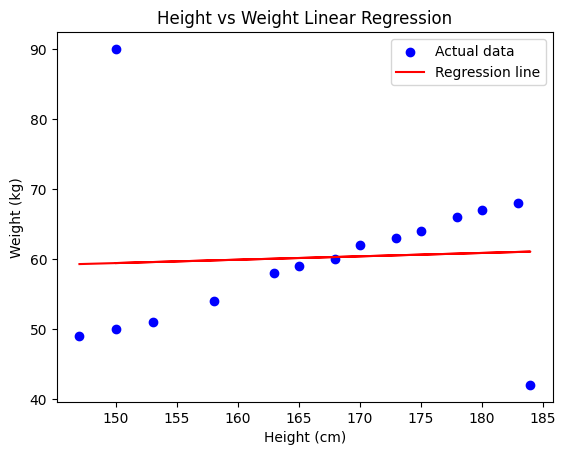

Intercept: 52.191208328318694
Slope: 0.04811048260921893
Predicted weight for height 160 cm: 59.89 kg


In [5]:
# Datasets
height = [147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183, 184, 150]
weight = [49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68, 42, 90]

# Reshape the data
height = np.array(height).reshape(-1, 1)
weight = np.array(weight)

# Create and train the linear regression model
model = LinearRegression()
model.fit(height, weight)

# Predict weights based on the model
predicted_weight = model.predict(height)

# Plotting the data and the regression line
plt.scatter(height, weight, color='blue', label='Actual data')
plt.plot(height, predicted_weight, color='red', label='Regression line')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight Linear Regression')
plt.legend()
plt.savefig('height_weight_regression.png')
plt.show()

# Print the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

# Predicting the weight for a given height (example)
example_height = 160
predicted_weight_example = model.predict(np.array([[example_height]]))
print(f"Predicted weight for height {example_height} cm: {predicted_weight_example[0]:.2f} kg")

Trong phần trực quan hóa dữ liệu ta thấy dữ liệu có thể đã xuất hiện outlier (ngoại lai) làm cho đường hồi quy không đi qua các điểm dữ liệu. Để loại bỏ các điểm outlier, ta có thể sử dụng phương pháp Z-score để loại bỏ ngoại lai. Z-score là một giá trị thống kê thể hiện mức độ lệch chuẩn của một điểm dữ liệu so với giá trị trung bình của toàn bộ tập dữ liệu. Nó cho biết một giá trị cụ thể nằm xa bao nhiêu độ lệch chuẩn so với giá trị trung bình của dữ liệu.
Thông thường trong thực ngiệm, người ta chọn ngưỡng |z-score| = 2, trên ngưỡng đó thì coi là điểm ngoại lai và loại bỏ 

In [6]:
# Original dataset
data = np.array([
    [147,  49],
    [150,  50],
    [153,  51],
    [158,  54],
    [163,  58],
    [165,  59],
    [168,  60],
    [170,  62],
    [173,  63],
    [175,  64],
    [178,  66],
    [180,  67],
    [183,  68],
    [184,  42],
    [150,  90]
])
z_scores = np.abs(stats.zscore(data, axis=0))
threshold = 2
outliers = np.where((z_scores > threshold).any(axis=1))

# Remove outliers
cleaned_data = np.delete(data, outliers, axis=0)

print("Z-scores:")
print(z_scores)

# print("\nOutliers identified at indices:")
# print(outliers)

print("\nCleaned dataset:")
print(cleaned_data)

Z-scores:
[[1.60169004 1.03858157]
 [1.35485425 0.94585108]
 [1.10801846 0.85312058]
 [0.69662546 0.57492909]
 [0.28523247 0.20400709]
 [0.12067528 0.1112766 ]
 [0.12616052 0.0185461 ]
 [0.29071771 0.1669149 ]
 [0.53755351 0.25964539]
 [0.7021107  0.35237589]
 [0.9489465  0.53783689]
 [1.1135037  0.63056738]
 [1.36033949 0.72329788]
 [1.44261809 1.68769506]
 [1.35485425 2.76336883]]

Cleaned dataset:
[[147  49]
 [150  50]
 [153  51]
 [158  54]
 [163  58]
 [165  59]
 [168  60]
 [170  62]
 [173  63]
 [175  64]
 [178  66]
 [180  67]
 [183  68]
 [184  42]]


Phán đoán theo kinh nghiệm thực tế, bộ dữ liệu mới có thể vẫn tồn tại outlier, ta tính toán lại các z-score và làm sạch dữ liệu một lần nữa

In [7]:
import numpy as np
from scipy import stats

# Given dataset
data = np.array([
    [147,  49],
    [150,  50],
    [153,  51],
    [158,  54],
    [163,  58],
    [165,  59],
    [168,  60],
    [170,  62],
    [173,  63],
    [175,  64],
    [178,  66],
    [180,  67],
    [183,  68],
    [184,  42]
])

z_scores = np.abs(stats.zscore(data, axis=0))
threshold = 2
outliers = np.where((z_scores > threshold).any(axis=1))

# Remove outliers
cleaned_data = np.delete(data, outliers, axis=0)

print("Z-scores:")
print(z_scores)

# print("\nOutliers identified at indices:")
# print(outliers)

print("\nCleaned dataset:")
print(cleaned_data)

Z-scores:
[[1.7603308  1.20537636]
 [1.50450418 1.07250023]
 [1.24867756 0.93962409]
 [0.82229985 0.54099569]
 [0.39592215 0.00949115]
 [0.22537107 0.12338498]
 [0.03045555 0.25626112]
 [0.20100663 0.52201338]
 [0.45683325 0.65488952]
 [0.62738433 0.78776565]
 [0.88321095 1.05351792]
 [1.05376203 1.18639405]
 [1.30958866 1.31927019]
 [1.3948642  2.1355093 ]]

Cleaned dataset:
[[147  49]
 [150  50]
 [153  51]
 [158  54]
 [163  58]
 [165  59]
 [168  60]
 [170  62]
 [173  63]
 [175  64]
 [178  66]
 [180  67]
 [183  68]]


Intercept: -33.73541020580774
Coefficients: [0.55920496]


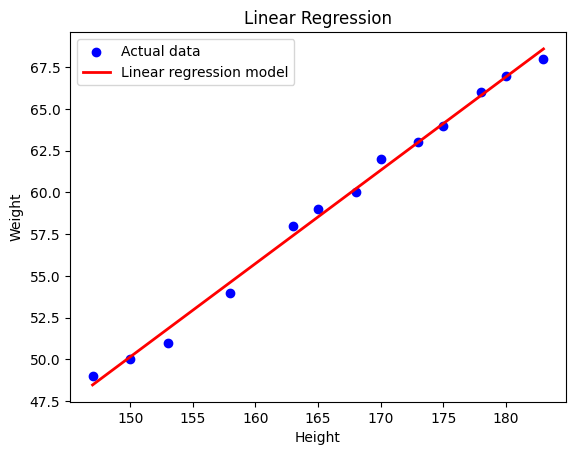

In [8]:
X = cleaned_data[:, 0].reshape(-1, 1)  # Chiều cao
y = cleaned_data[:, 1]  # Cân nặng

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X, y)

# Dự đoán
y_pred = model.predict(X)

# In ra các hệ số
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

# Vẽ biểu đồ
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear regression model')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Linear Regression')
plt.legend()
plt.show()